In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import VOCDetection
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
trainval_data = VOCDetection(root='data/', year='2012', image_set='trainval', download=True, transform=ToTensor())

Using downloaded and verified file: data/VOCtrainval_11-May-2012.tar
Extracting data/VOCtrainval_11-May-2012.tar to data/


In [ ]:
len(trainval_data)

11540

torch.Size([3, 500, 492])
1


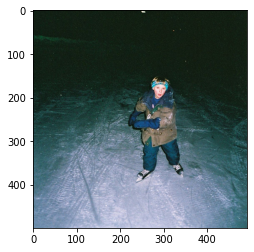

In [ ]:
img, label = trainval_data[764]
print(img.shape)
print(label['annotation']['segmented'])
plt.imshow(img.permute((1,2,0)));

torch.Size([3, 375, 500])
1
train


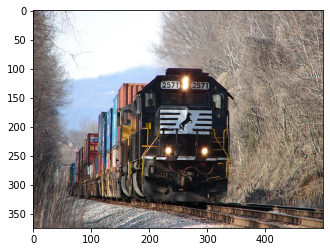

In [ ]:
img, label = trainval_data[324]
print(img.shape)
print(label['annotation']['segmented'])
print(label['annotation']['object'][0]['name'])
plt.imshow(img.permute((1,2,0)));

In [ ]:
#label = {'annotation':
# {'folder': 'VOC2012',
#  'filename': '2008_000657.jpg',
#  'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'},
#  'size': {'width': '500', 'height': '375', 'depth': '3'},
#  'segmented': '1',
#  'object': [{'name': 'train', 'pose': 'Frontal', 'truncated': '0', 'occluded': '0', 'bndbox': {'xmin': '58', 'ymin': '99', 'xmax': '341', 'ymax': '333'}, 'difficult': '0'}]}
# }

In [ ]:
segment = []
classes = []
for _, label in trainval_data:
  #if (label['annotation']['segmented']) not in classes.keys():
  #  classes[(label['annotation']['segmented'])] = (label['annotation']['object'][0]['name'])
  segment.append(label['annotation']['segmented'])
  classes.append(label['annotation']['object'][0]['name'])

segment = set(segment)
classes = set(classes)
segment = list(segment)
classes = list(classes)

In [ ]:
segment

['1', '0']

In [ ]:
classes

['dog',
 'bicycle',
 'motorbike',
 'train',
 'bus',
 'aeroplane',
 'cow',
 'tvmonitor',
 'horse',
 'diningtable',
 'boat',
 'person',
 'bottle',
 'sofa',
 'cat',
 'chair',
 'car',
 'sheep',
 'pottedplant',
 'bird']

In [ ]:
def accuracy(out, target):
  _, preds = torch.max(out, dim=1)
  return torch.tensor(torch.sum(preds == target).item() / len(preds))

In [ ]:
class VOCModelBase(nn.Module):
  def training_steb(self, batch):
    xb, target = batch
    out = self(xb)
    loss = F.cross_entropy(out, target)
    return loss

  def validation_step(self, batch):
    xb, target = batch
    out = self(xb)
    val_loss = F.cross_entropy(out, target)
    val_acc = accuracy(out, target)
    return {'val_loss': val_loss, 'val_acc': val_acc}